In [16]:
%matplotlib notebook
%matplotlib notebook
import json
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def intersect(ax, ay, bx, by):
    #aibx = np.in1d(ax, bx, invert=True)
    aibx = np.in1d(ax, bx) #All points from B in A (True)
    aiby = np.in1d(ay, by) #All points from B in A (True)
    biax = np.in1d(bx, ax) #All points from A in B
    biay = np.in1d(by, ay) #All points from A in B
    aib = aibx & aiby
    bia = biax & biay
    #print(ay[0], ax[0], by[0], bx[0])
    if True in aib and False in aib:
        pos_fal_ab = np.where(aib == False)
        #pos_fal_ab = np.where(aib == False)
        pos_fal_ba = np.where(bia == False)
        #pos_fal_ba = np.where(bia == False)

        #Change to get FFFFTTTTFFFF and not TTFFTTTT of common points
        ax = np.roll(ax, len(aib)-pos_fal_ab[0][0])
        aibx = np.roll(aib, len(aib)-pos_fal_ab[0][0])
        bx = np.roll(bx, len(bia)-pos_fal_ba[0][0])
        biax = np.roll(bia, len(bia)-pos_fal_ba[0][0])
        
        ay = np.roll(ay, len(aib)-pos_fal_ab[0][0])
        by = np.roll(by, len(bia)-pos_fal_ba[0][0])

        #Get first and las position of common points
        pos_points = np.where(aibx==True)
        a_pi = pos_points[0][0]
        a_pf = pos_points[0][len(pos_points[0])-1]
        pos_points = np.where(biax==True)
        b_pi = pos_points[0][0]
        b_pf = pos_points[0][len(pos_points[0])-1]
#         print("Vertices: ", ax[a_pi], bx[b_pf], ax[a_pf], bx[b_pi])
        if ax[a_pi] != bx[b_pf]:
            bx = bx[::-1]
            biax = biax[::-1]
            by = by[::-1]
            pos_fal_ba = np.where(biax == False)
#             print(biax)
#             bx = np.roll(bx, len(biax)-pos_fal_ba[0][3])
#             biax = np.roll(biax, len(biax)-pos_fal_ba[0][3])
#             by = np.roll(by, len(biax)-pos_fal_ba[0][3])
            bx = np.roll(bx, len(biax)-pos_fal_ba[0][0])
            biax = np.roll(biax, len(biax)-pos_fal_ba[0][0])
            by = np.roll(by, len(biax)-pos_fal_ba[0][0])
            pos_points = np.where(biax==True)
            b_pi = pos_points[0][0]
            b_pf = pos_points[0][len(pos_points[0])-1]
        
        #print("Vertices: ", ax[a_pi], bx[b_pf], ax[a_pf], bx[b_pi])
        if ax[a_pi] != bx[b_pf]:
            bx = bx[::-1]
            biax = biax[::-1]
            by = by[::-1]
            pos_fal_ba = np.where(biax == False)
            bx = np.roll(bx, len(biax)-pos_fal_ba[0][0])
            biax = np.roll(biax, len(biax)-pos_fal_ba[0][0])
            by = np.roll(by, len(biax)-pos_fal_ba[0][0])
            pos_points = np.where(biax==True)
            b_pi = pos_points[0][0]
            b_pf = pos_points[0][len(pos_points[0])-1]
        
        #print("Vertices: ", ax[a_pi], bx[b_pf], ax[a_pf], bx[b_pi])
        b_pf += 1
        a_pf += 1
        rax = np.concatenate((ax[0:a_pi], bx[b_pf:len(bx)], bx[0:b_pi], ax[a_pf:len(ax)]))
        ray = np.concatenate((ay[0:a_pi], by[b_pf:len(bx)], by[0:b_pi], ay[a_pf:len(ax)]))
        #print(len(ay[0:a_pi]), len(by[b_pf:len(bx)]), len(by[0:b_pi]), len(ay[a_pf:len(ax)]))
        #print(aibx)
        #print(biax)
        #print(ay, by)
        #print(len(ax[0:a_pi]), len(bx[b_pf:len(bx)]), len(bx[0:b_pi]), len(ax[a_pf:len(ax)]))
        #tfarray = np.concatenate((aibx[0:a_posi], biax[b_posf:len(biax)], biax[0:b_posi], aibx[a_posf:len(aibx)]))
        #print(ax)
        #print(aibx)
        return (True, rax, ray)
    else: return (False, None, None)
    
    

counties = None
with open('../covidbr-vis/src/assets/json/brm.json', 'r') as f:
    counties = json.load(f)

In [26]:
x = []
y = []
states= set()
dict_state = {"AC": "ACRE", "AL": "ALAGOAS", "AM": "AMAZONAS", "AP": "AMAPA",
 "BA": "BAHIA", "CE": "CEARÁ", "DF": "DISTRITO FEDERAL", "ES": "ESPÍRITO SANTO", "GO": "GOIÁS", "MA": "MARANHÃO",
 "MG": "MINAS GERAIS", "MS": "MATO GROSSO DO SUL", "MT": "MATO GROSSO", "PA": "PARÁ",
 "PB": "PARAÍBA", "PE": "PERNAMBUCO", "PI": "PIAUÍ", "PR": "PARANÁ",
 "RJ": "RIO DE JANEIRO", "RN": "RIO GRANDE DO NORTE",
 "RO": "RONDÔNIA", "RR": "RORAIMA", "RS": "RIO GRANDE DO SUL", "SC": "SANTA CATARINA",
 "SE": "SERGIPE", "SP": "ALAGOAS", "SP": "SÃO PAULO", "TO": "TOCANTINS"}
collection = {"type": "FeatureCollection", "features": []} 
states = {"SP"}
# for e in counties["features"]:
#     states.add(e["properties"]["UF"])
rid = 0
for state in states:
    for e in counties["features"]:
        if e["properties"]["UF"] != state:
            continue
        print(e["properties"]["NOME_MUNI"])
        tempx = []
        tempy = []
        if e["geometry"]["type"] == "Polygon":
            coord = e["geometry"]["coordinates"][0]
            tx = np.array([str(p[0]) for p in coord])
            ty = np.array([str(p[1]) for p in coord])
            tx = np.delete(tx, 0)
            ty = np.delete(ty, 0)
            tempx.append(tx)
            tempy.append(ty)
        else:
            for ar_coord in e["geometry"]["coordinates"]:
                for coord in ar_coord:
                    tx = np.array([str(p[0]) for p in coord])
                    ty = np.array([str(p[1]) for p in coord])
                    tx = np.delete(tx, 0)
                    ty = np.delete(ty, 0)
                    tempx.append(tx)
                    tempy.append(ty)
        x.append(tempx)
        y.append(tempy)
    q = 0
    while q < 10:
        outx, outy = x[0], y[0]
        ignore = np.zeros([1000, 1000])
        for i in range(1,len(x)):
            for j in range(len(x[i])):
                out2x, out2y = outx, outy
                add_new_region = True 
                #print(len(out2x), len(out2y), j)
                for index, el in enumerate(out2x):
                    if ignore[i][j] == 1: continue
                    [share_border, x_points, y_points] = intersect(out2x[index], out2y[index], x[i][j], y[i][j])
                    if share_border:
                        add_new_region = False
                        del outx[index], outy[index]
                        outx.append(x_points)
                        outy.append(y_points)
                        ignore[i][j] = 1
                if add_new_region:
                    outx.append(x[i][j])
                    outy.append(y[i][j])
        x, itx = [], 0
        for tx in outx:
            x.append([])
            x[itx].append(tx)
            itx+=1
        y, ity = [], 0
        for ty in outy:
            y.append([])
            y[ity].append(ty)
            ity+=1
        q+=1
    ##Procesar para agregar a array de salida
    geometry_type = "Polygon"
    coordinates = []
    #print(len(x[0][0]))
    if len(x) > 1: 
        geometry_type = "MultiPolygon"
        for i in range(len(x)):
            coords=[]
            for j in range(len(x[i][0])):
                coords.append([float(x[i][0][j]), float(y[i][0][j])])
            coords.append([float(x[0][0][0]), float(y[0][0][0])])
            coordinates.append([coords])

    geometry = {"type": geometry_type, "coordinates": coordinates}
    
    feature = {"type": "Feature", "id": rid,
               "properties": {"UF": state, "NOME_UF": dict_state[state]}, 
               "geometry": geometry
              }
    collection["features"].append(feature)
    rid+=1
#print(collection)
with open('states.json', 'w') as outfile:
    json.dump(collection, outfile)
px = np.array([0.0])
for elx in outx: px = np.concatenate((px, elx))
px = np.delete(px, 0)
px = px.astype(np.float)
py = np.array([0.0])
for ely in outy: py = np.concatenate((py, ely))
py = np.delete(py, 0)
py = py.astype(np.float)


São Sebastião da Grama
São Simão
São Vicente
Sarapuí
Sarutaiá
Sebastianópolis do Sul
Serra Azul
Serrana
Serra Negra
Sertãozinho
Sete Barras
Severínia
Silveiras
Socorro
Sorocaba
Sud Mennucci
Sumaré
Suzano
Suzanápolis
Tabapuã
Tabatinga
Taboão da Serra
Taciba
Taguaí
Taiaçu
Taiúva
Tambaú
Tanabi
Tapiraí
Tapiratiba
Taquaral
Taquaritinga
Taquarituba
Taquarivaí
Tarabai
Tarumã
Tatuí
Taubaté
Tejupá
Teodoro Sampaio
Terra Roxa
Tietê
Timburi
Torre de Pedra
Torrinha
Trabiju
Tremembé
Três Fronteiras
Tuiuti
Tupã
Tupi Paulista
Turiúba
Turmalina
Ubarana
Ubirajara
Uchoa
União Paulista
Urânia
Uru
Urupês
Valentim Gentil
Valinhos
Valparaíso
Vargem
Vargem Grande do Sul
Vargem Grande Paulista
Várzea Paulista
Vera Cruz
Vinhedo
Viradouro
Vista Alegre do Alto
Vitória Brasil
Votorantim
Votuporanga
Zacarias
Chavantes
Estiva Gerbi
Adamantina
Adolfo
Aguaí
Águas da Prata
Águas de Lindóia
Águas de Santa Bárbara
Águas de São Pedro
Agudos
Alambari
Alfredo Marcondes
Altair
Altinópolis
Alto Alegre
Alumínio
Álvares Florenc

<IPython.core.display.Javascript object>


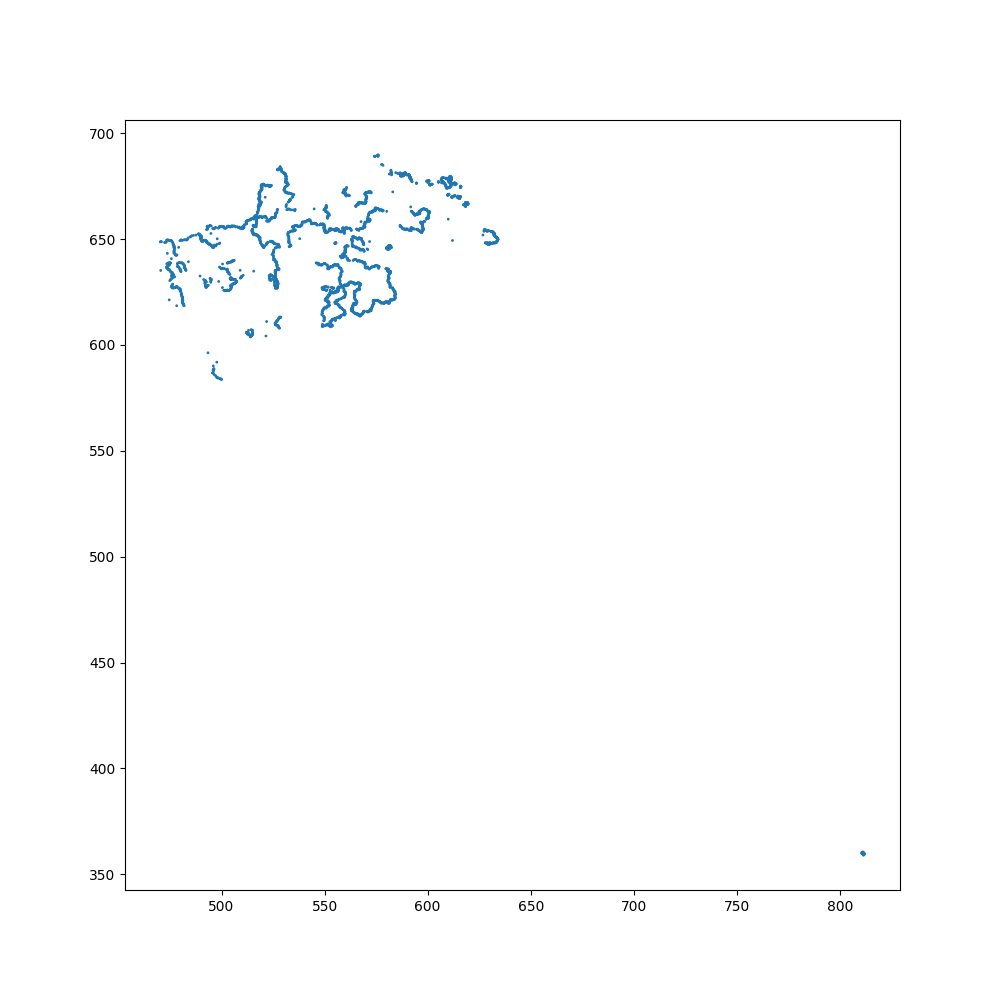

In [27]:
area = np.ones(px.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(px, py, s=area)
#print(px)
#for i in range(len(px)):
#    x = px[i]
#    y = py[i]
    #print(i, x, y)
#    plt.plot(x, y, 'bo')
#    plt.text(x * (1 + 0.00001), y * (1 + 0.00001) , i, fontsize=6)

#plt.show()

<IPython.core.display.Javascript object>


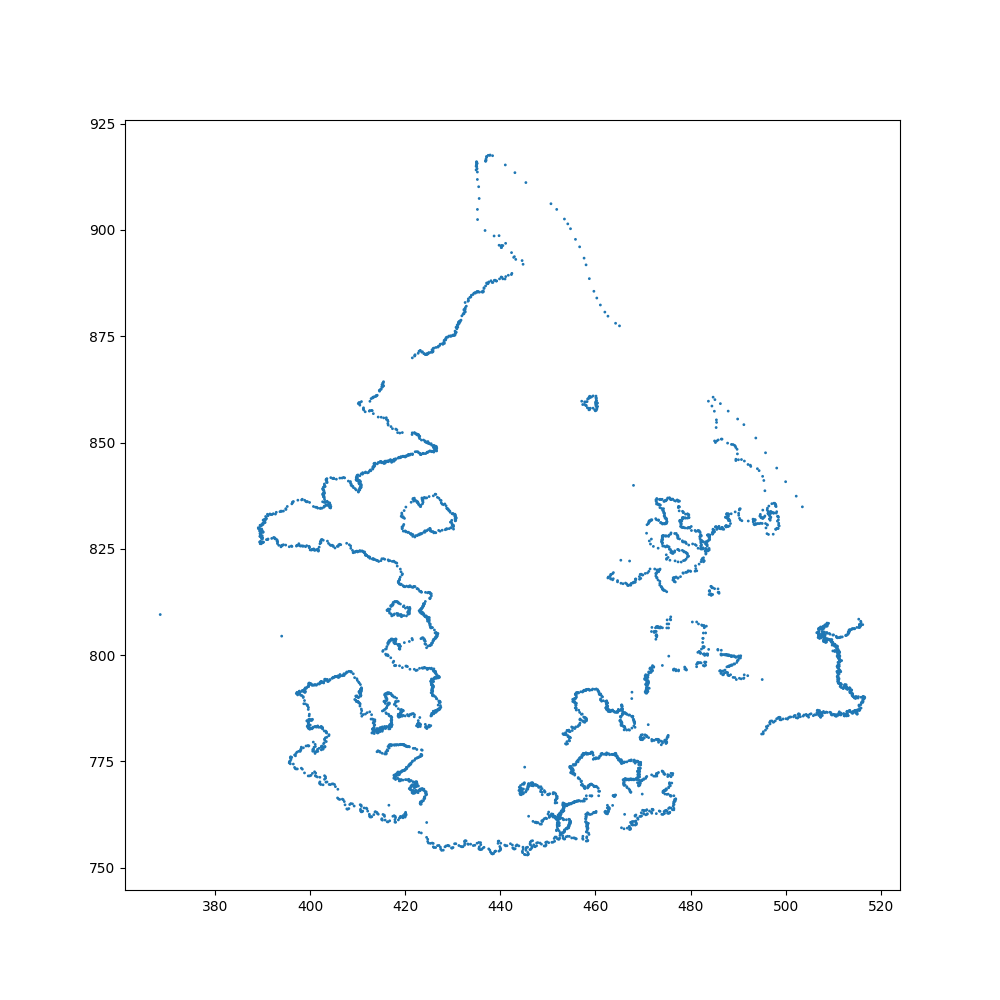

In [25]:
area = np.ones(px.shape[0])
plt.figure(figsize=(10,10))
plt.scatter(px, py, s=area)
#print(px)
#for i in range(len(px)):
#    x = px[i]
#    y = py[i]
    #print(i, x, y)
#    plt.plot(x, y, 'bo')
#    plt.text(x * (1 + 0.00001), y * (1 + 0.00001) , i, fontsize=6)

#plt.show()